In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
     "text.usetex": True,
     "font.family": "Helvetica"
}) 

## Q3: A perfect circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:

$$x = R\cos(\theta)$$

$$y = R\sin(\theta)$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

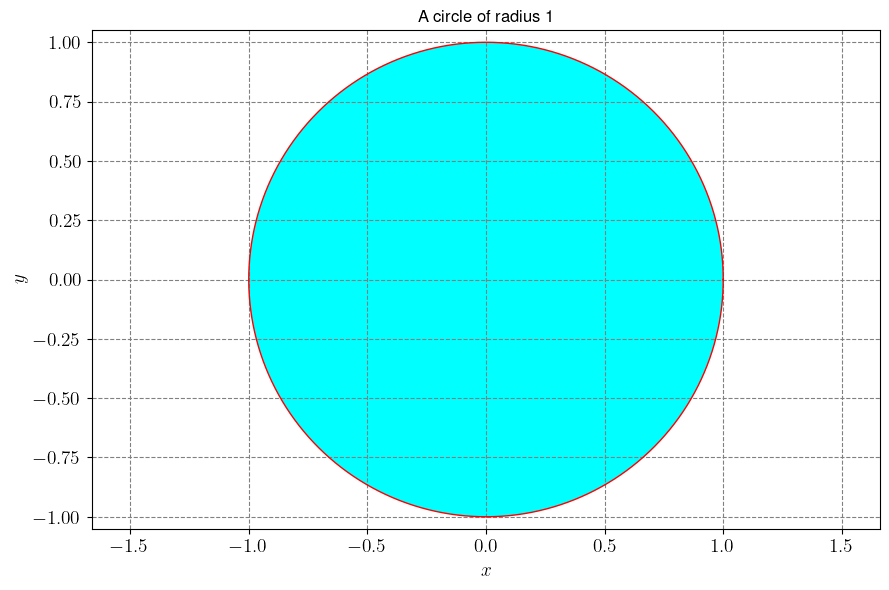

In [2]:
theta = np.linspace(0, 2*np.pi, 1000)
R = 1
x = R*np.cos(theta)
y = R*np.sin(theta)

fig, ax = plt.subplots(figsize=(9,6))

fsize=14

ax.set_title(f"A circle of radius {R}")
ax.plot(x, y, color='red', linestyle='-', linewidth='1.0', markersize=3.0)
ax.fill(x, y, "cyan")
ax.grid(color='grey', linestyle='--', axis='both')
ax.set_xlabel(r"$x$", fontsize=fsize)
ax.tick_params(axis='x', labelsize=fsize)
ax.set_ylabel(r"$y$", fontsize=fsize)
ax.tick_params(axis='y', labelsize=fsize)
ax.axis("equal")
fig.tight_layout()

Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

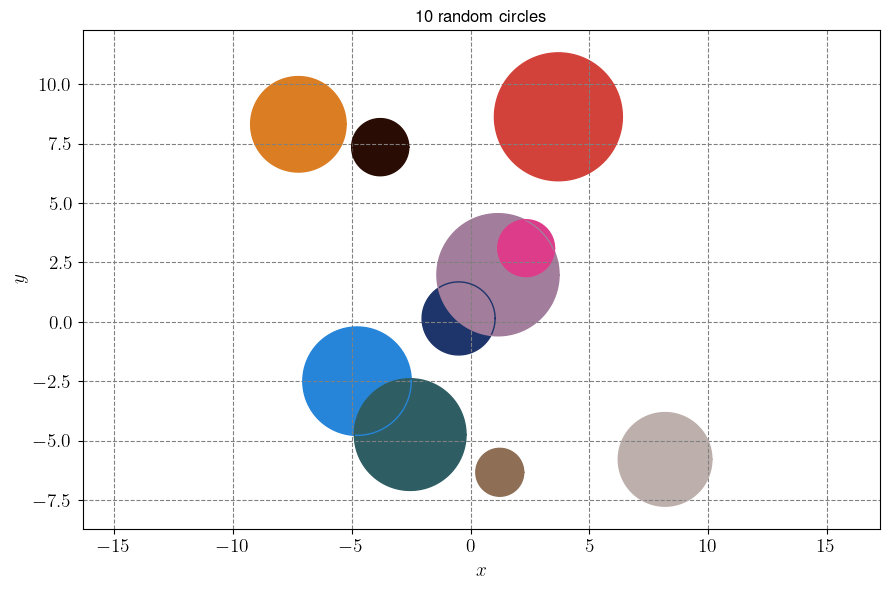

In [9]:
import random

N = 10

def draw_circle(x0, y0, R, color):
    x = R*np.cos(theta)+x0
    y = R*np.sin(theta)+y0
    ax.plot(x, y, color=color, linestyle='-', linewidth='1.0', markersize=3.0)
    ax.fill(x, y, color)


fig, ax = plt.subplots(figsize=(9,6))

theta = np.linspace(0, 2*np.pi, 1000)
fsize=14

ax.set_title(f"{N} random circles")
for i in range(N):
    RGB_col = '#'
    for j in range(6):
        RGB_col += random.choice('0123456789ABCDEF')
    draw_circle(
        random.uniform(-10.0, 10.0), 
        random.uniform(-10.0, 10.0), 
        random.uniform(1.0, 3.0),
        RGB_col
        )

ax.grid(color='grey', linestyle='--', axis='both')
ax.set_xlabel(r"$x$", fontsize=fsize)
ax.tick_params(axis='x', labelsize=fsize)
ax.set_ylabel(r"$y$", fontsize=fsize)
ax.tick_params(axis='y', labelsize=fsize)
ax.axis("equal")
fig.tight_layout()

## Q5: Subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplots()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


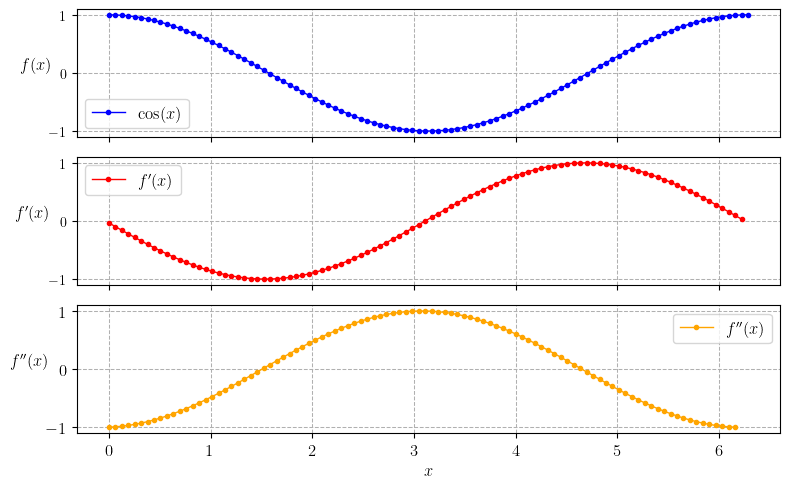

In [10]:
npts = 100
x = np.linspace(0.0, 2*np.pi, npts)
#f   = x**3 - 4*x**2 - 5*x +2
f   = np.cos(x)
fp  = (f[1:] - f[:-1]) / (x[1] - x[0])
fpp = (fp[1:] - fp[:-1]) / (x[1] - x[0])

fig, ax = plt.subplots(3, 1, figsize=(8, 5), sharex=True)

plt.subplots_adjust(top    = 0.95)
plt.subplots_adjust(bottom = 0.12)
plt.subplots_adjust(left   = 0.13)
plt.subplots_adjust(right  = 0.96)
fsize = 12

#plt.title(r'', pad=15, fontsize=fsize)

ax[0].grid(linestyle = '--', linewidth = 0.75)
ax[0].plot(x, f, color='blue', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=3.0,   label=r'$\cos(x)$')  #label=r'$f(x) = x^3 - 4x^2 -5x + 2$
ax[0].set_ylabel(r'$f(x)$', rotation=0, labelpad=10, fontsize=fsize)
ax[0].legend(loc='best', fontsize=fsize)

ax[1].grid(linestyle = '--', linewidth = 0.75)
ax[1].plot(x[:-1], fp, color='red', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=3.0,   label=r"$f'(x)$")
ax[1].set_ylabel(r"$f'(x)$", rotation=0, labelpad=12, fontsize=fsize)
ax[1].legend(loc='best', fontsize=fsize)

ax[2].grid(linestyle = '--', linewidth = 0.75)
ax[2].plot(x[:-2], fpp, color='orange', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=3.0,   label=r"$f''(x)$")
ax[2].set_xlabel(rf'$x$', fontsize=fsize)
ax[2].set_ylabel(r"$f''(x)$", rotation=0, labelpad=12, fontsize=fsize)
ax[2].legend(loc='best', fontsize=fsize)


plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)

fig.tight_layout()
